In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [88]:
# importing data
housing_multi = pd.read_csv('data/Housing.csv')
housing_multi.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [89]:
housing_multi.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [90]:
housing_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data preparation
* transforming yes and no into Binary
* also do some innovation in furnished data

In [91]:
# map is an extension pf pandas
housing_multi['mainroad'] = housing_multi['mainroad'].map({'yes':1,'no':0})
housing_multi['guestroom'] = housing_multi['guestroom'].map({'yes':1,'no':0})
housing_multi['basement'] = housing_multi['basement'].map({'yes':1,'no':0})
housing_multi['hotwaterheating'] = housing_multi['hotwaterheating'].map({'yes':1,'no':0})
housing_multi['airconditioning'] = housing_multi['airconditioning'].map({'yes':1,'no':0})
housing_multi['prefarea'] = housing_multi['prefarea'].map({'yes':1,'no':0})

In [92]:
status = pd.get_dummies(housing_multi['furnishingstatus'])
status.head()


,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [93]:
# if furnished and unfurnished is 0 then semi is one
# so we can cut it off

status = pd.get_dummies(housing_multi['furnishingstatus'],drop_first=True)
status.head()


,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [94]:
housing_multi = pd.concat([housing_multi,status],axis=1)

In [95]:
housing_multi.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [96]:
# dropping the whole furnished status column since the needed data is already concatenated
housing_multi.drop(['furnishingstatus'],axis=1,inplace=True)

In [97]:
housing_multi.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Adding extra variable columns that can be useful

In [98]:
housing_multi['areaPerBedroom'] = housing_multi['area']/housing_multi['bedrooms']
housing_multi['bbratio'] = housing_multi['bathrooms']/housing_multi['bedrooms']
housing_multi.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaPerBedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the Features
cause without the rescaling the coefficents of the variables will be very large numbers

for Example:

$m_1$$x_1$ + $m_2$$x_2$ + $m_3$$x_3$ + ...

if $m_1$ is a large number it will override all the linear equation the other terms will be shadowed

$normalize$ = $x - min \over max - min$

$x\in[min,max]$

In [99]:
def normalize(x):
    minVal  = min(x)
    return (x-minVal) / (max(x) - minVal)

In [100]:
housing_multi = housing_multi.apply(normalize)

In [101]:
all_list = np.array(housing_multi.columns)
x_list = all_list[all_list!='price'] # filtering

X = housing_multi[x_list]
y = housing_multi['price']


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=100)

### Building a linear Model

In [103]:
X_train = sm.add_constant(X_train)

# first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [104]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.56e-82
Time:                        14:26:44   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

### Some Notes on Correlation
Correlation cases one case is valid
$x_1 = 3.5 x_2$

but in case of multiple cases it can get harder
$x_1 + 2x_2= 3.5 x_3$

this multi correlation problem we have to use something called VIF

Variance inflation factor

$VIF(x_1) =  \frac{1}{1-R^2}$

lets say we have some independent columns $x_1,x_2,x_3,x_4$

take out $x_1$ as my $y$ $\to$ $x_2,x_3,x_4$

if we did it and $R^2$ is a high value then there is good dependence

if $R^2$ is high and $VIF$ will high

some Thumb rule $ VIF < 5$

In [105]:
def vif_cal(input_data,dependent_col):
    vif_df = pd.DataFrame(columns=['Var','Vif'])
    x_vars = input_data.drop([dependent_col],axis=1)
    x_var_name = x_vars.columns
    for i in range(0,x_var_name.shape[0]):
        y = x_vars[x_var_name[i]]
        x = x_vars[x_var_name.drop(x_var_name[i])]
        rsq = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [x_var_name[i],vif]
    return vif_df.sort_values(by='Vif',axis=0,ascending=False,inplace=False)

In [106]:
vif_cal(input_data=housing_multi,dependent_col='price')


,Var,Vif
13,areaPerBedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


### Correlation matrix

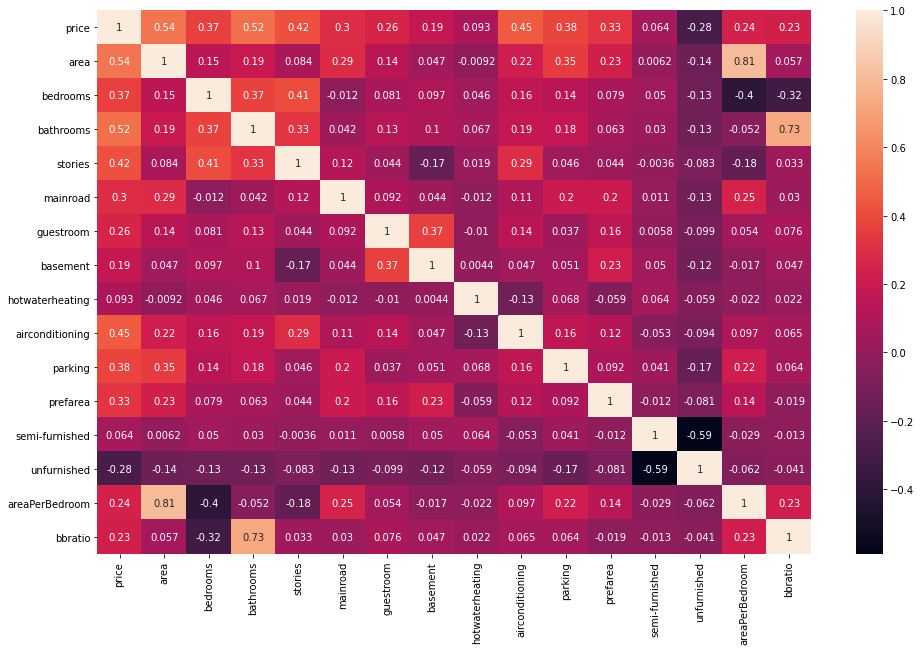

In [107]:
plt.figure(figsize=(16,10))
sns.heatmap(housing_multi.corr(),annot=True)
plt.show()

### Data analysis
we realise from the first model that bbratio $p$ value is high, so we go and check its $VIF$
value since its $VIF$ is high as well we can drop that column

same thing we can see semi-furnished also has high $p$ value but its $VIF$ is normal so we keep it

In [111]:
# deleting bbratio
X_train = X_train.drop('bbratio',1)

In [112]:
# create a second model
lm_2 = sm.OLS(y_train,X_train).fit()

In [114]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           6.46e-83
Time:                        14:28:13   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

### The Effects of Dropping the bbratio

In [115]:
vif_cal(input_data=housing_multi.drop(['bbratio'],axis=1),dependent_col='price')

,Var,Vif
0,area,20.72
13,areaPerBedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


### Data analysis
again apply the same data analysis now we drop the second best thing in $p$ with $VIF$

In [116]:
X_train = X_train.drop('bedrooms',1)


In [117]:
lm_3 = sm.OLS(y_train,X_train).fit()


In [119]:
print(lm_3.summary())
vif_cal(input_data=housing_multi.drop(['bbratio','bedrooms'],axis=1),dependent_col='price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.66e-83
Time:                        14:36:55   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

,Var,Vif
0,area,14.98
12,areaPerBedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


### another Round of data analysis


In [122]:
X_train = X_train.drop('areaPerBedroom',1)

In [123]:
lm_4 = sm.OLS(y_train,X_train).fit()


In [125]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.35e-83
Time:                        14:42:53   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [126]:
vif_cal(input_data=housing_multi.drop(['bbratio','bedrooms','areaPerBedroom'],axis=1),dependent_col='price')

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


### another Round of data analysis

In [127]:
X_train = X_train.drop('semi-furnished',1)

In [128]:
lm_5 = sm.OLS(y_train,X_train).fit()

In [131]:
print(lm_5.summary())
vif_cal(input_data=housing_multi.drop(['bbratio','bedrooms','areaPerBedroom','semi-furnished'],axis=1),dependent_col='price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.73e-84
Time:                        14:46:32   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [132]:
X_train = X_train.drop('basement',1)

In [133]:
lm_6 = sm.OLS(y_train,X_train).fit()

In [134]:
print(lm_6.summary())
vif_cal(input_data=housing_multi.drop(['bbratio','bedrooms','areaPerBedroom','semi-furnished','basement'],axis=1),dependent_col='price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.13e-84
Time:                        14:48:41   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


### Finishing with analysis
since every $p$ value is small

## Model Predicition using our last model
### Model Prediciton using our model $N^0 6$
### Model Evaluation

In [135]:
x_test_m6 = sm.add_constant(X_test)

In [136]:
x_test_m6 = x_test_m6.drop(['bbratio','bedrooms','areaPerBedroom','semi-furnished','basement'],axis=1)

In [137]:
y_pred_m6 = lm_6.predict(x_test_m6)


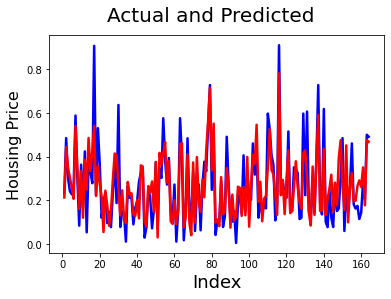

In [140]:
# actual vs predicted
c = [i for i in range(1,165,1)] # 544 total .3 is 165
fig = plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle ='-')
plt.plot(c,y_pred_m6,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Housing Price',fontsize=16)
plt.show()

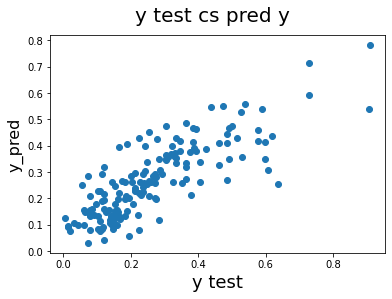

In [142]:
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y test cs pred y',fontsize=20)
plt.xlabel('y test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)
plt.show()

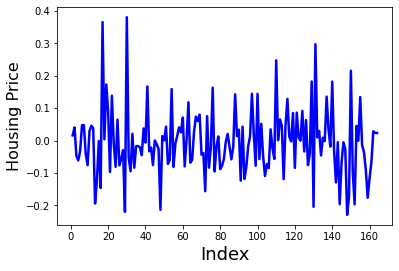

In [143]:
# Error Terms
c = [i for i in range(1,165,1)] # 544 total .3 is 165
fig = plt.figure()
plt.plot(c,y_test-y_pred_m6,color='blue',linewidth=2.5,linestyle ='-')
plt.xlabel('Index',fontsize=18)
plt.ylabel('Housing Price',fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

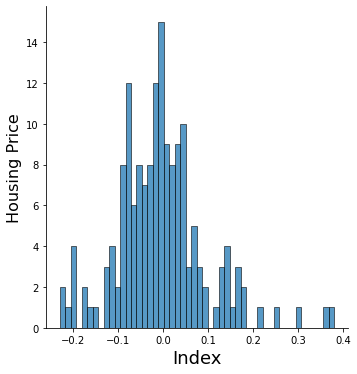

In [144]:
sns.displot((y_test-y_pred_m6),bins=50)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Housing Price',fontsize=16)
plt.show()

In [145]:
# some metrics
from sklearn import metrics
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_m6)))

RMSE : 0.10001092336807833
